<a href="https://colab.research.google.com/github/sumitkmr93/Predictive-Analytics-California-Housing/blob/master/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **California Housing Price Prediction**

In [1]:
# Importing all required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Getting the data, from Github repo.

url = 'https://github.com/sumitkmr93/Predictive-Analytics-California-Housing/blob/master/housing.csv?raw=true'
housingDF = pd.read_csv(url)
housingDF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Exploratory Data Analysis


**Take a Quick Look at the Data Structure** 

*   The ***info()*** method is useful to get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of nonnull values.

In [4]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*   Notice that the total_bedrooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature. We will need to take care of this later.
*   Next, You can find out what categories exist and how many districts belong to each category by using the ***value_counts()*** method.


In [5]:
housingDF.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

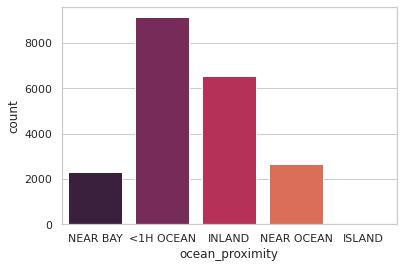

In [12]:
# Plotting the above stats using Seaborn library
sns.set_theme(style="whitegrid")
sns.countplot(x=housingDF.ocean_proximity,palette="rocket")

*   The ***describe()*** method shows a summary of the numerical attributes.


In [13]:
housingDF.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*   Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. *A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis)*. You can either plot this one attribute at a time, or you can call the ***hist()*** method on the whole dataset, and it will plot a histogram for each numerical attribute.

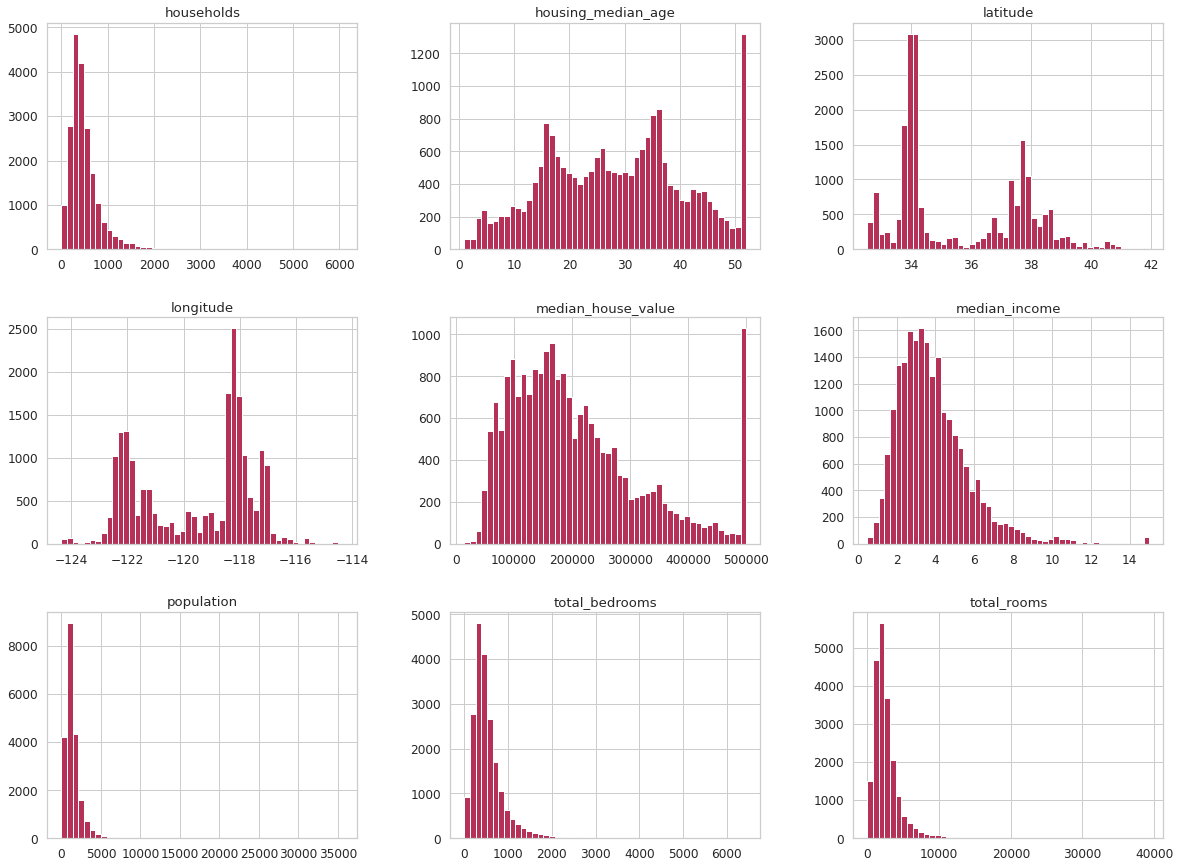

In [26]:
sns.set(style='whitegrid',  font_scale=1.1, rc={"figure.figsize": [20, 15]})
housingDF.hist(bins=50,color='#b53158')
plt.show()

**Findings from the above histograms:**

1. Many histograms are ***tail-heavy***: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

2.  The *median income* attribute does not look like it is expressed in US dollars (USD).
[ Given in Problem Statement: The data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000) ]. 

3. The *housing median age* and the *median house value* were also capped. The latter may be a serious problem since it is the target attribute. 



---




* Now, let's understand the correlation between variable by plotting correlation plot using ***corr()*** method to generate the correlations.

In [34]:
# Compute pairwise correlation of columns, excluding NA/null values. Using the default "pearson" method
housingDF.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


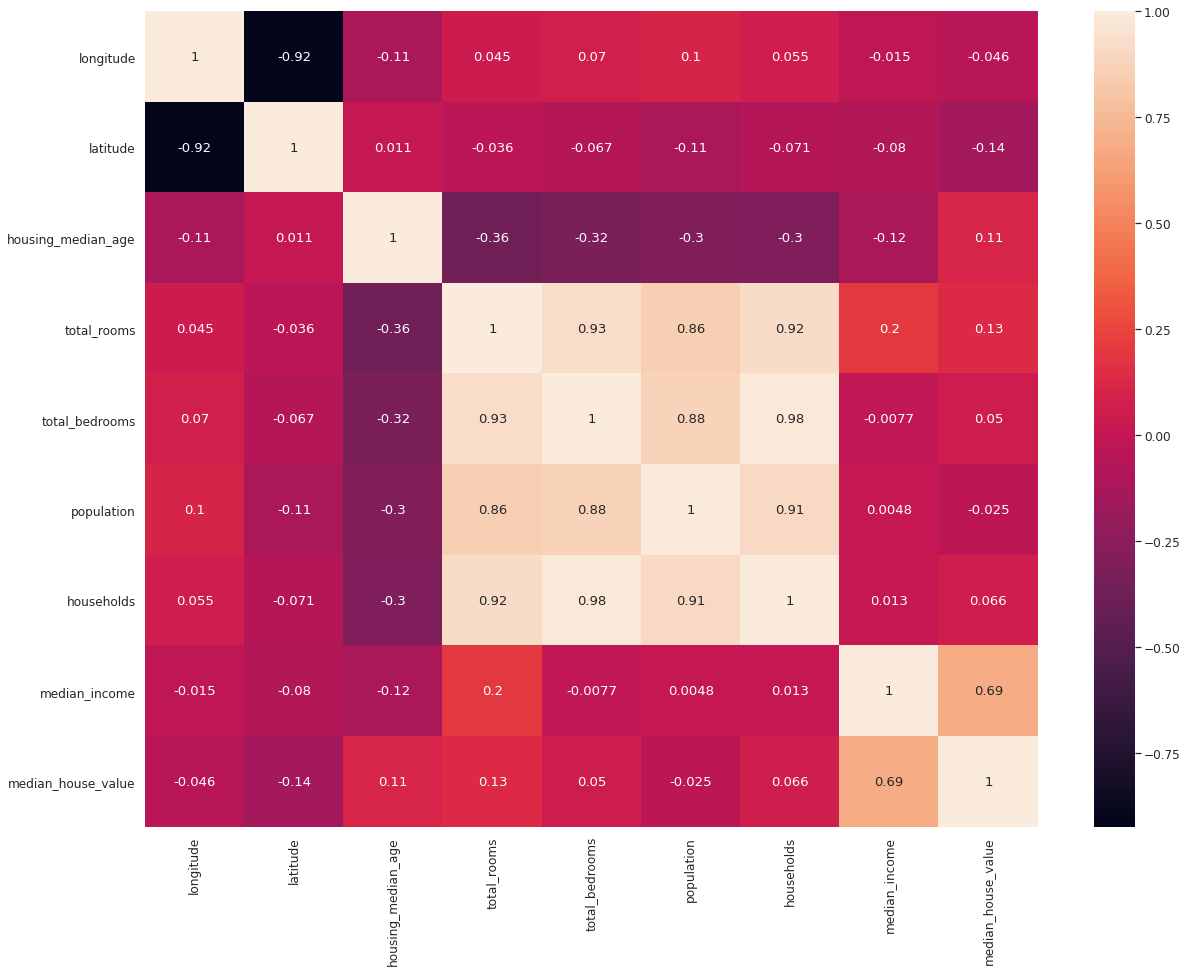

In [43]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [20, 15]})
sns.heatmap(housingDF.corr(), annot=True, cmap='rocket')
plt.show()

In [35]:
# Sorting the correlations in descending order to get the most correlated attribute with the target attribute.
housingDF.corr().sort_values(ascending=False,by='median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**We now have a much better understanding of the kind of data we are dealing with.**